**LFSSTAT: Labor Force Status**

"LFSSTAT" most likely stands for "Labor Force Status". It's a common variable in labor force surveys and typically represents the employment status of an individual. It might have categories like:

Employed


Unemployed


Not in the labor force


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [11]:
# Load your dataset
df = pd.read_csv("/content/sasdata.csv")


In [ ]:
# Target variable
target_col = "LFSSTAT"

In [ ]:
# Drop irrelevant or ID-like columns
drop_cols = ['Unnamed: 0', 'REC_NUM', 'SURVYEAR', 'SURVMNTH']
df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')


In [ ]:
# Drop columns with more than 40% missing values
df = df.loc[:, df.notnull().mean() > 0.6]


In [ ]:
# Drop rows where the target is missing
df = df[df[target_col].notnull()]


In [ ]:
# Features and target
X = df.drop(columns=[target_col])
y = df[target_col]

In [ ]:
# Encode object-type columns
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

In [ ]:
# Fill missing values
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [ ]:
# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

(np.float64(-1.0999995822379096),
 np.float64(1.0999964478292341),
 np.float64(-1.0999993298992403),
 np.float64(1.09999996809044))

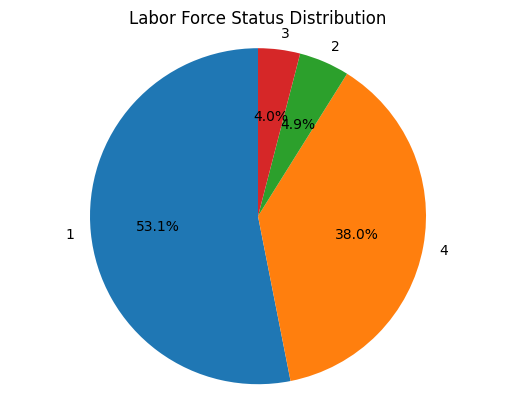

In [12]:
#Create the pie chart
import matplotlib.pyplot as plt # Correct the import statement

# Calculate the counts of each labor force status
status_counts = df['LFSSTAT'].value_counts()

# Define labels for the pie chart
labels = status_counts.index.tolist()  # Assuming LFSSTAT has numerical values representing statuses

plt.pie(status_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Labor Force Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8802953067322904

 Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.98      0.92     12060
           2       0.42      0.03      0.06      1058
           3       0.51      0.15      0.24       936
           4       0.93      0.92      0.92      8702

    accuracy                           0.88     22756
   macro avg       0.68      0.52      0.53     22756
weighted avg       0.85      0.88      0.85     22756



**Evaluation for Unemployment Rate Prediction using XGBoost**

# our  aims to build a predictive model for unemployment rates using a combination of feature engineering, data preprocessing, and the XGBoost algorithm. The evaluation metrics provide insights into the model's accuracy and the feature importance analysis highlights the key factors influencing unemployment predictions.

   Unnamed: 0  REC_NUM  SURVYEAR  SURVMNTH  LFSSTAT  PROV  CMA  AGE_12  AGE_6  \
0           0        1      2025         2        4    24    2      12    NaN   
1           1        2      2025         2        1    35    4       4    NaN   
2           2        3      2025         2        1    35    4       6    NaN   
3           3        4      2025         2        4    47    0      12    NaN   
4           4        5      2025         2        1    24    2       7    NaN   

   GENDER  ...  LKATADS  LKANSADS  LKOTHERN  PRIORACT  YNOLOOK  TLOLOOK  \
0       1  ...      NaN       NaN       NaN       NaN      NaN      NaN   
1       2  ...      NaN       NaN       NaN       NaN      NaN      NaN   
2       2  ...      NaN       NaN       NaN       NaN      NaN      NaN   
3       1  ...      NaN       NaN       NaN       NaN      NaN      NaN   
4       2  ...      NaN       NaN       NaN       NaN      NaN      NaN   

   SCHOOLN  EFAMTYPE  AGYOWNK  FINALWT  
0      NaN        18 

<ipython-input-23-956a5277f057>:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


RMSE: 0.002166162769761163
R² Score: 0.9893070582512354


<Figure size 1000x600 with 0 Axes>

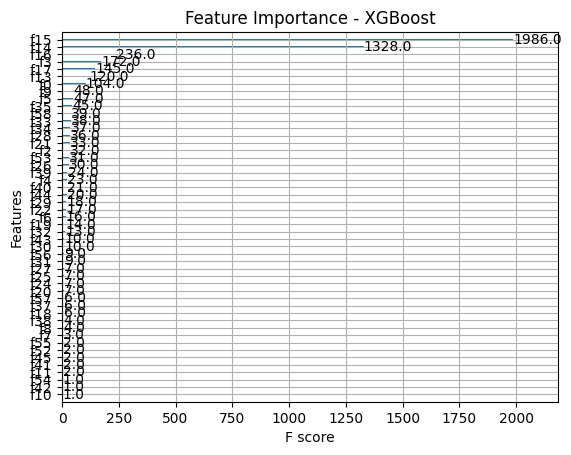

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor, plot_importance

# Load the Data (Replace with your actual file path)
df = pd.read_csv('/content/sasdata.csv')

#  Explore the Data
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Feature Engineering

if 'SURVYEAR' in df.columns and 'SURVMNTH' in df.columns:
    df['Date'] = pd.to_datetime(df['SURVYEAR'].astype(str) + '-' + df['SURVMNTH'].astype(str), format='%Y-%m')
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Quarter'] = df['Date'].dt.quarter
else:
    print("SURVYEAR or SURVMNTH columns not found. Skipping date-based feature engineering.")


 #Drop irrelevant columns
df = df.drop(columns=['Date', 'Province_Code', 'Other_Identifiers', 'SURVYEAR', 'SURVMNTH'], errors='ignore')

#  Handle Missing Values (Simple strategy; customize as needed)
df = df.fillna(method='ffill')

# Group by NAICS_21 and IMMIG to find unemployment rates
grouped = df_model_imputed.groupby(['NAICS_21', 'IMMIG'])['Unemployed'].mean().reset_index()
grouped = grouped.rename(columns={'Unemployed': 'UnemploymentRate'})

#Merge the unemployment rate back into the original dataframe
df = df.merge(grouped, on=['NAICS_21', 'IMMIG'], how='left')


# Define Features and Target
X = df.drop(columns=['UnemploymentRate'])
y = df['UnemploymentRate']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

#  Feature Importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model)
plt.title("Feature Importance - XGBoost")
plt.show()

ours aim is to predict unemployment among immigrants in specific sectors using machine learning, particularly the XGBoost algorithm. It focuses on sectors with a high percentage of immigrants (over 10%).

Accuracy: 0.940045535036681

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      3719
           1       0.00      0.00      0.00       234

    accuracy                           0.94      3953
   macro avg       0.47      0.50      0.48      3953
weighted avg       0.89      0.94      0.91      3953



<Figure size 1000x600 with 0 Axes>

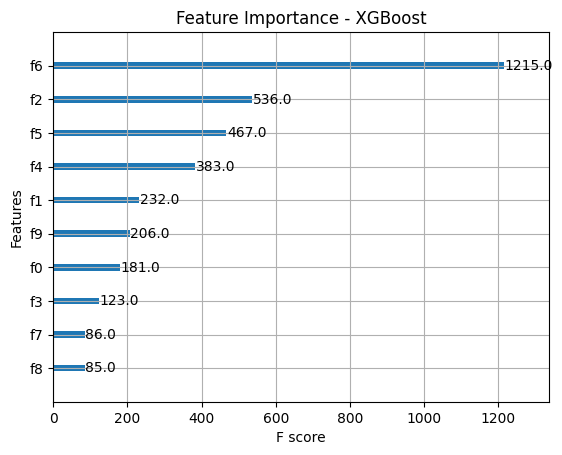

In [ ]:
!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier, plot_importance


# 1. Load and Preprocess Data
df = pd.read_csv('/content/sasdata.csv')

# Create target variable 'Unemployed' (1 if LFSSTAT == 2, else 0)
df['Unemployed'] = (df['LFSSTAT'] == 2).astype(int)

# Drop irrelevant columns
drop_cols = ['Unnamed: 0', 'REC_NUM', 'SURVYEAR', 'SURVMNTH',
             'Province_Code', 'Other_Identifiers', 'LFSSTAT']
df = df.drop(columns=drop_cols, errors='ignore')

# Calculate immigrant percentage per sector (NAICS_21)
df['Immigrant_Percentage'] = df.groupby('NAICS_21')['IMMIG'].transform(lambda x: (x == 1).sum() / len(x) * 100)

threshold = 10
df_filtered = df[df['Immigrant_Percentage'] > threshold]



#  Feature Engineering and Selection

features = ['IMMIG', 'NAICS_21', 'AGE_12', 'GENDER', 'EDUC', 'PROV',
            'HRLYEARN', 'UNION', 'PERMTEMP', 'Immigrant_Percentage']
X = df_filtered[features]
y = df_filtered['Unemployed']

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Preprocessing Pipeline
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#  Model Training and Evaluation
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42))
])

model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Feature Importance
plt.figure(figsize=(10, 6))
plot_importance(model_pipeline.named_steps['classifier'])
plt.title("Feature Importance - XGBoost")
plt.show()

**To find unemployment in every sector**

In [ ]:


# relevant features including sector
features = ['IMMIG', 'NAICS_21', 'AGE_12', 'GENDER', 'EDUC', 'PROV',
            'HRLYEARN', 'UNION', 'PERMTEMP']
df_model = df[features + ['Unemployed']].copy()

# Drop rows with missing NAICS_21
df_model = df_model.dropna(subset=['NAICS_21', 'IMMIG'])

# Impute other missing values
imputer = SimpleImputer(strategy='most_frequent')
df_model_imputed = pd.DataFrame(imputer.fit_transform(df_model), columns=df_model.columns)

# Group by NAICS_21 and IMMIG to find unemployment rates
grouped = df_model_imputed.groupby(['NAICS_21', 'IMMIG'])['Unemployed'].mean().reset_index()
grouped = grouped.rename(columns={'Unemployed': 'UnemploymentRate'})

# Filter sectors where IMMIG =1 (immigrants)
immigrant_sectors = grouped[grouped['IMMIG'] == 1].sort_values(by='UnemploymentRate', ascending=False)

# top 10 sectors with highest unemployment rates among immigrants
print(immigrant_sectors.head(10))

    NAICS_21  IMMIG  UnemploymentRate
6        3.0    1.0          0.400000
3        2.0    1.0          0.285714
12       5.0    1.0          0.115385
36      13.0    1.0          0.108434
48      17.0    1.0          0.105932
9        4.0    1.0          0.090909
15       6.0    1.0          0.081272
51      18.0    1.0          0.077295
30      11.0    1.0          0.074766
42      15.0    1.0          0.072727


 Exploratory Data Analysis (EDA)  Problem Statement:
Problem Statement:
 aims to conduct a comprehensive exploratory data analysis (EDA) of labor force survey data to uncover trends and patterns related to employment status, work hours, and income. By analyzing variables such as age, gender, education, industry, and union membership, the study seeks to understand how demographic and socioeconomic factors influence workforce participation and earnings across different regions in Canada. Insights generated will help inform policies aimed at improving labor market inclusivity and efficiency.


In [ ]:
import pandas as pd

# Assuming your SAS dataset is named 'sasdata.sas7bdat'
df = pd.read_csv('/content/sasdata.csv')

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113780 entries, 0 to 113779
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  113780 non-null  int64  
 1   REC_NUM     113780 non-null  int64  
 2   SURVYEAR    113780 non-null  int64  
 3   SURVMNTH    113780 non-null  int64  
 4   LFSSTAT     113780 non-null  int64  
 5   PROV        113780 non-null  int64  
 6   CMA         113780 non-null  int64  
 7   AGE_12      113780 non-null  int64  
 8   AGE_6       23176 non-null   float64
 9   GENDER      113780 non-null  int64  
 10  MARSTAT     113780 non-null  int64  
 11  EDUC        113780 non-null  int64  
 12  MJH         65951 non-null   float64
 13  EVERWORK    47829 non-null   float64
 14  FTPTLAST    8062 non-null    float64
 15  COWMAIN     74013 non-null   float64
 16  IMMIG       113780 non-null  int64  
 17  NAICS_21    74013 non-null   float64
 18  NOC_10      74013 non-null   float64
 19  NO

,0
Unnamed: 0,0
REC_NUM,0
SURVYEAR,0
SURVMNTH,0
LFSSTAT,0
...,...
TLOLOOK,113603
SCHOOLN,28954
EFAMTYPE,0
AGYOWNK,84465


In [ ]:
df.describe()

,Unnamed: 0,REC_NUM,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,AGE_6,GENDER,...,LKANSADS,LKOTHERN,PRIORACT,YNOLOOK,TLOLOOK,SCHOOLN,EFAMTYPE,AGYOWNK,FINALWT,AGE_EDUC
count,113780.000000,113780.000000,113780.0,113780.0,113780.000000,113780.000000,113780.000000,113780.000000,23176.000000,113780.000000,...,2032.0,1172.0,4310.000000,1574.000000,177.000000,84826.000000,113780.000000,29315.00000,113780.000000,113780.000000
mean,56889.500000,56890.500000,2025.0,2.0,2.269283,34.646194,1.744551,7.177993,3.601096,1.512392,...,1.0,1.0,1.531787,2.527954,1.570621,1.173968,6.307840,2.21518,302.233890,25.005432
std,32845.601151,32845.601151,0.0,0.0,1.420868,14.663765,2.799104,3.615036,1.726938,0.499849,...,0.0,0.0,0.964579,1.969938,0.496392,0.431090,5.462684,1.08282,276.376752,17.211836
min,0.000000,1.000000,2025.0,2.0,1.000000,10.000000,0.000000,1.000000,1.000000,1.000000,...,1.0,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
25%,28444.750000,28445.750000,2025.0,2.0,1.000000,24.000000,0.000000,4.000000,2.000000,1.000000,...,1.0,1.0,1.000000,1.000000,1.000000,1.000000,2.000000,1.00000,131.000000,12.000000
50%,56889.500000,56890.500000,2025.0,2.0,1.000000,35.000000,0.000000,7.000000,4.000000,2.000000,...,1.0,1.0,1.000000,2.000000,2.000000,1.000000,3.000000,2.00000,214.000000,24.000000
75%,85334.250000,85335.250000,2025.0,2.0,4.000000,47.000000,4.000000,11.000000,5.000000,2.000000,...,1.0,1.0,2.000000,4.000000,2.000000,1.000000,11.000000,3.00000,358.000000,36.000000
max,113779.000000,113780.000000,2025.0,2.0,4.000000,59.000000,9.000000,12.000000,6.000000,2.000000,...,1.0,1.0,3.000000,6.000000,2.000000,3.000000,18.000000,4.00000,3198.000000,72.000000


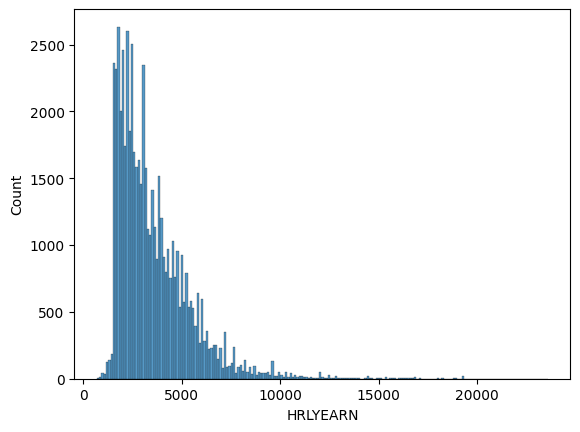

In [ ]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['HRLYEARN'])
plt.show()

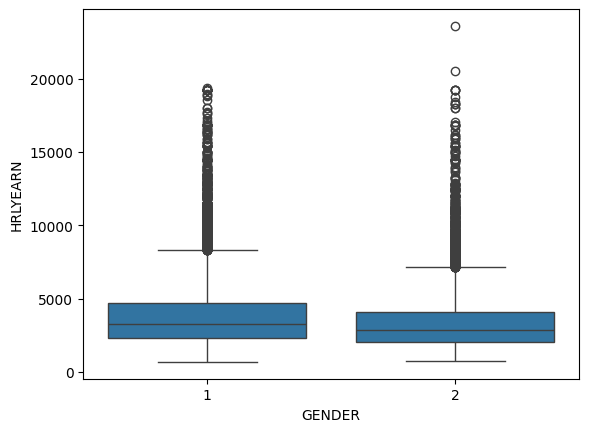

In [ ]:
sns.boxplot(x='GENDER', y='HRLYEARN', data=df)
plt.show()

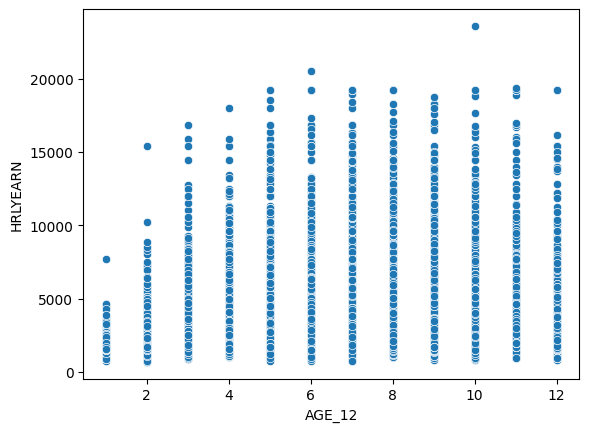

In [ ]:
sns.scatterplot(x='AGE_12', y='HRLYEARN', data=df)
plt.show()

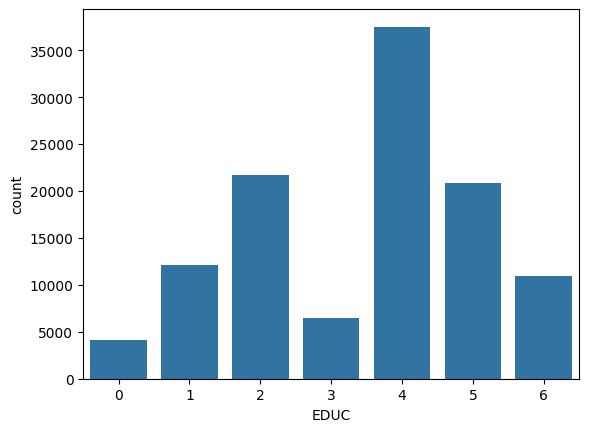

In [ ]:
sns.countplot(x='EDUC', data=df)
plt.show()

In [ ]:
#employment status
df['LFSSTAT'].value_counts()

,count
LFSSTAT,
1,60424
4,43234
2,5527
3,4595


In [ ]:
#Work Hours (COWMAIN, UHWKHRS):
df['COWMAIN'].value_counts()



,count
COWMAIN,
2.0,47378
1.0,17250
6.0,4444
4.0,2276
3.0,2124
5.0,478
7.0,63


In [ ]:
#Income (HRLYEARN, ALHRWK)
df['HRLYEARN'].describe()
if 'ALHRWK' in df.columns:
    df['HRLYEARN'].describe()
    df['ALHRWK'].describe()
else:
    print("Column 'ALHRWK' not found in the DataFrame.")



Column 'ALHRWK' not found in the DataFrame.


In [ ]:
# Explore relationships between variables
df.corr()
df.groupby('GENDER')['HRLYEARN'].mean()
pd.crosstab(df['EDUC'], df['LFSSTAT'])


LFSSTAT,1,2,3,4
EDUC,,,,
0,693,88,118,3179
1,3461,389,665,7595
2,10239,955,1082,9442
3,3145,274,309,2752
4,21529,2025,1356,12596
5,13894,1186,696,5118
6,7463,610,369,2552


**Predictive Modeling**: Employment Status
Problem Statement:
The objective of this project is to build a predictive model to determine an individual’s employment status based on their demographic and socioeconomic characteristics. Using features such as age, education, marital status, occupation, and province, we aim to train a machine learning model that can accurately classify individuals as employed, unemployed, or not in the labor force. This model could help employment agencies target interventions more effectively.


In [ ]:
!pip install xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder # Import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier


# 1. Load and Preprocess Data
df = pd.read_csv('/content/sasdata.csv')

# Define target variable: 'Employment_Status'
# Assuming 'LFSSTAT' represents employment status:
# 1: Employed, 2: Unemployed, 3: Not in labor force
df['Employment_Status'] = df['LFSSTAT'].map({1: 'Employed', 2: 'Unemployed', 3: 'Not in labor force'})

# Select relevant features (customize based on your dataset)
features = ['AGE_12', 'EDUC', 'MARSTAT', 'NOC_10', 'PROV', 'GENDER']
X = df[features]
y = df['Employment_Status']

# Encode the target variable using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y) # Encode target variable before splitting

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Preprocessing Pipeline

numerical_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 3. Model Training and Evaluation
# Create a pipeline with preprocessor and classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8258920724204606

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.95      0.86     12060
           1       0.50      0.00      0.00       936
           2       0.00      0.00      0.00      1058
           3       0.89      0.84      0.86      8702

    accuracy                           0.83     22756
   macro avg       0.54      0.45      0.43     22756
weighted avg       0.78      0.83      0.79     22756



**Modeling: Hourly Earnings**
Problem Statement:
our aim to seeks to predict hourly earnings of employed individuals based on variables such as age, gender, education, union membership, job tenure, and industry classification. By training a regression model, we aim to identify the most influential factors affecting wages, detect income disparities, and support evidence-based policy decisions to promote fair compensation practices across the labor market.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Data Preparation and Feature Engineering
df = pd.read_csv('/content/sasdata.csv')

# Create interaction feature (age * education)
df['AGE_EDUC'] = df['AGE_12'] * df['EDUC']

# Log transform target variable (HRLYEARN)
df['log_HRLYEARN'] = np.log1p(df['HRLYEARN'])

# Select features and target
features = ['AGE_12', 'GENDER', 'EDUC', 'UNION', 'TENURE', 'NAICS_21', 'AGE_EDUC', 'log_HRLYEARN']
target = 'HRLYEARN'
X = df[features]
y = df[target]

# Handle missing values in target
y = y.fillna(y.median())

# 2. Preprocessing
# Impute missing values
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# One-hot encode categorical features (if any)
# Assuming 'GENDER' and 'NAICS_21' are categorical
X = pd.get_dummies(pd.DataFrame(X, columns=features), columns=['GENDER', 'NAICS_21'], drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. Model Training and Evaluation
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 907.8349592854634
R-squared: 0.9995319275845564
Root Mean Squared Error: 30.13029968794641


________________________________________


This approach helps identify labour market integration challenges and opportunity gaps for immigrants, contributing to better employment equity policies.

In [ ]:

#  Load Data
df = pd.read_csv('/content/sasdata.csv')

#  Preprocessing
if 'SURVYEAR' in df.columns and 'SURVMNTH' in df.columns:
    df['Date'] = pd.to_datetime(df['SURVYEAR'].astype(str) + '-' + df['SURVMNTH'].astype(str), format='%Y-%m')
else:
    print("SURVYEAR or SURVMNTH columns not found. Cannot create Date column.")

df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter

# Fill missing values
df.fillna(method='ffill', inplace=True)

#  Filter sectors with high immigrant percentage

# Instead of 'Industry_Type', use 'NAICS_21'
high_immigrant_sectors = df.groupby('NAICS_21')['IMMIG'].mean()
high_immigrant_sectors = high_immigrant_sectors[high_immigrant_sectors > 0.30].index.tolist()

df_filtered = df[df['NAICS_21'].isin(high_immigrant_sectors)]
# Group by NAICS_21 and IMMIG to find unemployment rates
grouped = df_model_imputed.groupby(['NAICS_21', 'IMMIG'])['Unemployed'].mean().reset_index()
grouped = grouped.rename(columns={'Unemployed': 'UnemploymentRate'})

#Merge the unemployment rate back into the original dataframe
df_filtered = df_filtered.merge(grouped, on=['NAICS_21', 'IMMIG'], how='left')


# 5. Feature/Target
target = 'UnemploymentRate'  # Changed 'Unemployment_Rate' to 'UnemploymentRate'
X = df_filtered.drop(columns=[target, 'Date'])
y = df_filtered[target]

# Identify feature types
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# 6. Pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42))
])

# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Fit Model
pipeline.fit(X_train, y_train)

# 9. Predictions
y_pred = pipeline.predict(X_test)

# 10. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performance on High-Immigrant Sectors:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



<ipython-input-64-350ca24727a7>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Model Performance on High-Immigrant Sectors:
RMSE: 0.00
R² Score: 0.99


In [ ]:
# Replace 'UnemploymentRate' with the actual column
unemp_by_sector = df_filtered.groupby('NAICS_21')['UnemploymentRate'].mean().sort_values(ascending=False)

print("Sectors with highest unemployment (Immigrant-heavy):")
print(unemp_by_sector.head(5))

Sectors with highest unemployment (Immigrant-heavy):
NAICS_21
3.0     0.264208
17.0    0.100371
4.0     0.094169
2.0     0.092851
6.0     0.086798
Name: UnemploymentRate, dtype: float64


according to this our aims to predict unemployment rates in sectors with a high percentage of immigrants in Canada using machine learning.

LOW MIGRANTS

In [ ]:



# 2. Load Data
df = pd.read_csv('/content/sasdata.csv')


# 3. Preprocessing
if 'SURVYEAR' in df.columns and 'SURVMNTH' in df.columns:
    df['Date'] = pd.to_datetime(df['SURVYEAR'].astype(str) + '-' + df['SURVMNTH'].astype(str), format='%Y-%m')
else:
    print("SURVYEAR or SURVMNTH columns not found. Cannot create Date column.")

df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter


# threshold for low unemployment rate
low_unemployment_threshold = 0.05

# target variable: 1 for low unemployment, 0 otherwise
df_filtered['Low_Unemployment'] = (df_filtered['UnemploymentRate'] < low_unemployment_threshold).astype(int)

# Now, 'Low_Unemployment' is our target variable
target = 'Low_Unemployment'
y = df_filtered[target]

#  XGBClassifier in the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42))])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Performance on High-Immigrant Sectors (Low Unemployment Prediction):")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

Model Performance on High-Immigrant Sectors (Low Unemployment Prediction):
Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21376
           1       1.00      1.00      1.00      1380

    accuracy                           1.00     22756
   macro avg       1.00      1.00      1.00     22756
weighted avg       1.00      1.00      1.00     22756



Predict unemployment in sectors with a high percentage of immigrants and suggest government policies to increase employment in those sectors.


In [ ]:


# Load and preprocess data
df = pd.read_csv("/content/sasdata.csv")

# Create target variable: Unemployed (1 = Unemployed, 0 = Otherwise)
df['Unemployed'] = (df['LFSSTAT'] == 2).astype(int)

#  relevant features
features = ['IMMIG', 'NAICS_21', 'AGE_12', 'GENDER', 'EDUC', 'PROV',
            'HRLYEARN', 'UNION', 'PERMTEMP']
df_model = df[features + ['Unemployed']].copy()

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df_model_imputed = pd.DataFrame(imputer.fit_transform(df_model), columns=df_model.columns)

## Calculate immigrant percentage per sector (NAICS_21)
df['Immigrant_Percentage'] = df.groupby('NAICS_21')['IMMIG'].transform(lambda x: (x == 1).sum() / len(x) * 100)


# Train-test split
X = df_model_imputed.drop('Unemployed', axis=1)
y = df_model_imputed['Unemployed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate model
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
importances = pd.Series(clf.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))


[[21549   149]
 [  980    78]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     21698
         1.0       0.34      0.07      0.12      1058

    accuracy                           0.95     22756
   macro avg       0.65      0.53      0.55     22756
weighted avg       0.93      0.95      0.93     22756

HRLYEARN    0.388253
PROV        0.147896
AGE_12      0.138646
NAICS_21    0.135613
EDUC        0.098188
IMMIG       0.037978
PERMTEMP    0.019673
UNION       0.016902
GENDER      0.016851
dtype: float64
